In [1]:
from google.colab import drive  
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [18]:
import pandas as pd
# 결측값 확인 패키지
import missingno as msno
import numpy as np

In [4]:
PATH='/content/gdrive/MyDrive/개인 공부/dacon/dacon_energy/dacon_energy'

In [5]:
train = pd.read_csv(PATH + '/train.csv', encoding='cp949', header=0)
mis_test = pd.read_csv(PATH + '/test.csv', encoding='cp949', header=0)
sub = pd.read_csv(PATH + '/sample_submission.csv', encoding='cp949')

In [6]:
train.columns = ['num','datetime','power(kWh)','tempe(°C)','wind(m/s)','hum(%)','rain(mm)','sol(hr)','ne_cool','sol_energy']
mis_test.columns = ['num','datetime','tempe(°C)','wind(m/s)','hum(%)','rain(mm)','sol(hr)','ne_cool','sol_energy']

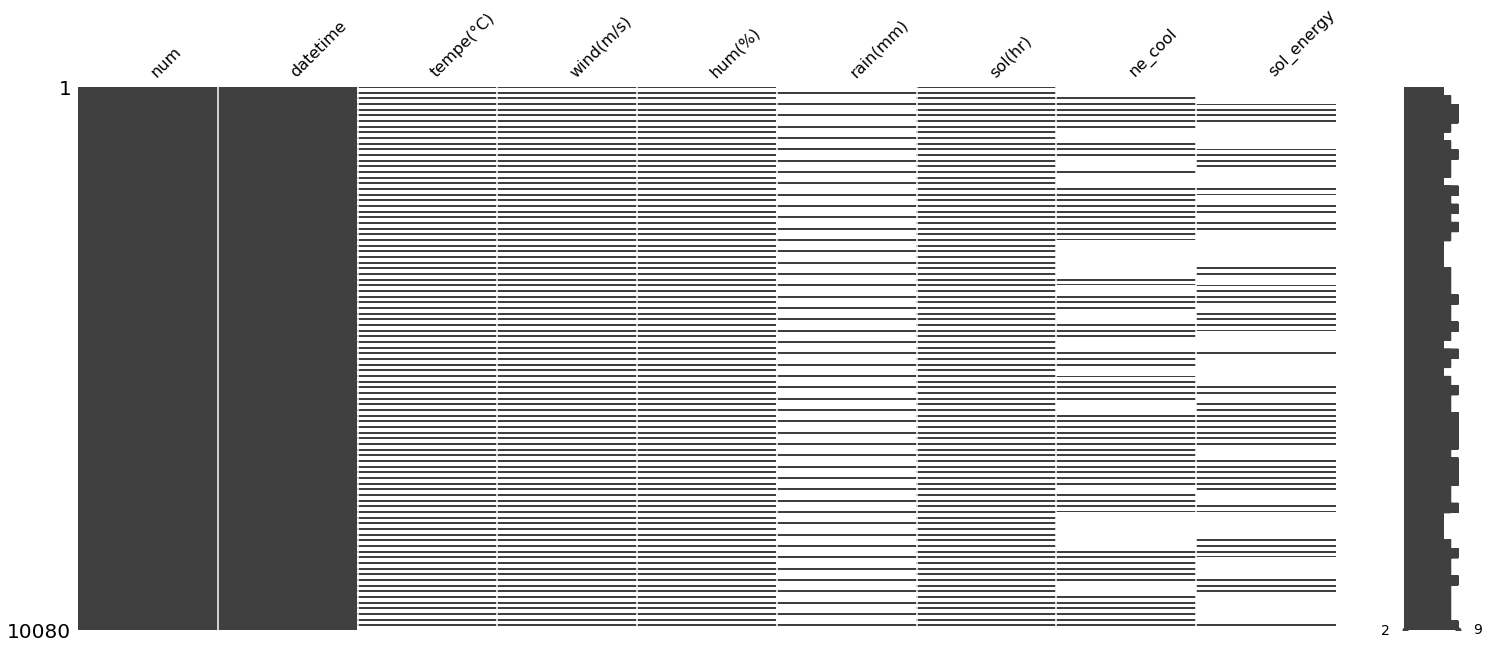

In [10]:
msno.matrix(mis_test)

In [11]:
#건물별로 '비전기냉방설비운영'과 '태양광보유'를 판단해 test set의 결측치를 보간해줍니다.
train[['num', 'ne_cool','sol_energy']]
ice={}
hot={}
count=0
for i in range(0, len(train), len(train)//60):
    count +=1
    ice[count]=train.loc[i,'ne_cool']
    hot[count]=train.loc[i,'sol_energy']

In [12]:
for i in range(len(mis_test)):
    mis_test.loc[i, 'ne_cool']=ice[mis_test['num'][i]]
    mis_test.loc[i, 'sol_energy']=hot[mis_test['num'][i]]

In [13]:
mis_test.head()

,num,datetime,tempe(°C),wind(m/s),hum(%),rain(mm),sol(hr),ne_cool,sol_energy
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,0.0,0.0
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,0.0,0.0
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [14]:
#시간 변수와 요일 변수를 추가해봅니다.
def time(x):
    return int(x[-2:])

train['time']=train['datetime'].apply(lambda x: time(x))
mis_test['time']=mis_test['datetime'].apply(lambda x: time(x))

# weekday() 함수 : 요일 반환 (0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일)
def weekday(x):
    return pd.to_datetime(x[:10]).weekday()

train['weekday']=train['datetime'].apply(lambda x :weekday(x))
mis_test['weekday']=mis_test['datetime'].apply(lambda x :weekday(x))

In [15]:
train

,num,datetime,power(kWh),tempe(°C),wind(m/s),hum(%),rain(mm),sol(hr),ne_cool,sol_energy,time,weekday
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,0,0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1,0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,2,0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,3,0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,19,0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,20,0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,21,0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,22,0


- test 결측값 보간하기
- test 데이터의 변수는 예보 데이터이며, 예보 데이터는 train 데이터의 기간에 생성된 것이기에 활용 가능함


- interpolate(method='values') 
    -  DataFrame 값에 선형으로 비례하는 방식으로 결측값 보간


In [16]:
test = mis_test.interpolate(method='values')
test

,num,datetime,tempe(°C),wind(m/s),hum(%),rain(mm),sol(hr),ne_cool,sol_energy,time,weekday
0,1,2020-08-25 00,27.800000,1.500000,74.000000,0.0,0.000000,0.0,0.0,0,1
1,1,2020-08-25 01,27.633333,1.366667,75.333333,0.0,0.000000,0.0,0.0,1,1
2,1,2020-08-25 02,27.466667,1.233333,76.666667,0.0,0.000000,0.0,0.0,2,1
3,1,2020-08-25 03,27.300000,1.100000,78.000000,0.0,0.000000,0.0,0.0,3,1
4,1,2020-08-25 04,26.900000,1.166667,79.666667,0.0,0.000000,0.0,0.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,28.633333,3.566667,66.000000,0.0,0.533333,1.0,1.0,19,0
10076,60,2020-08-31 20,28.266667,3.833333,67.000000,0.0,0.266667,1.0,1.0,20,0
10077,60,2020-08-31 21,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0,21,0
10078,60,2020-08-31 22,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0,22,0


In [17]:
mis_point = mis_test[mis_test['num']==1]

In [19]:
point = np.array(mis_point['tempe(°C)'])[np.isfinite(np.array(mis_point['tempe(°C)']))]
print(point)

[27.8 27.3 26.1 28.8 32.7 34.4 31.6 29.3 28.7 27.6 27.  29.7 33.3 33.5
 32.7 29.6 27.8 26.7 27.4 25.7 26.6 28.2 28.  27.5 26.7 26.4 26.  27.
 29.1 28.  28.5 26.8 26.4 26.4 25.5 27.8 26.5 28.2 28.2 26.  25.9 25.2
 24.8 25.5 28.2 30.3 29.6 26.2 24.4 23.9 23.9 25.4 27.  29.2 28.8 27.1]


In [20]:
point_index = []
num = 1
for i in range(len(point)):
  point_index.append(i*3)

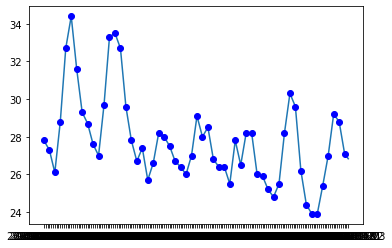

In [21]:
from matplotlib import pyplot as plt
# 결측치 처리 선형 확인
missing = test[test['num']==1]
plt.plot(missing['datetime'], missing['tempe(°C)'])
plt.plot(point_index, point, 'bo', color = 'blue')

In [22]:
point = np.array(mis_point['hum(%)'])[np.isfinite(np.array(mis_point['hum(%)']))]
print(point)

[74. 78. 83. 77. 57. 50. 63. 72. 76. 80. 82. 74. 60. 57. 55. 65. 73. 82.
 80. 92. 87. 82. 79. 83. 92. 93. 96. 92. 80. 87. 85. 89. 91. 92. 94. 85.
 92. 87. 82. 94. 95. 98. 98. 97. 86. 75. 77. 91. 88. 88. 87. 81. 75. 69.
 72. 74.]


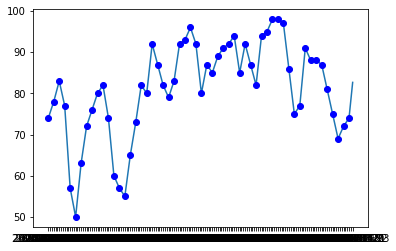

In [23]:
# 결측치 처리 선형 확인
missing = test[test['num']==1]
plt.plot(missing['datetime'], missing['hum(%)'])
plt.plot(point_index, point, 'bo', color = 'blue')

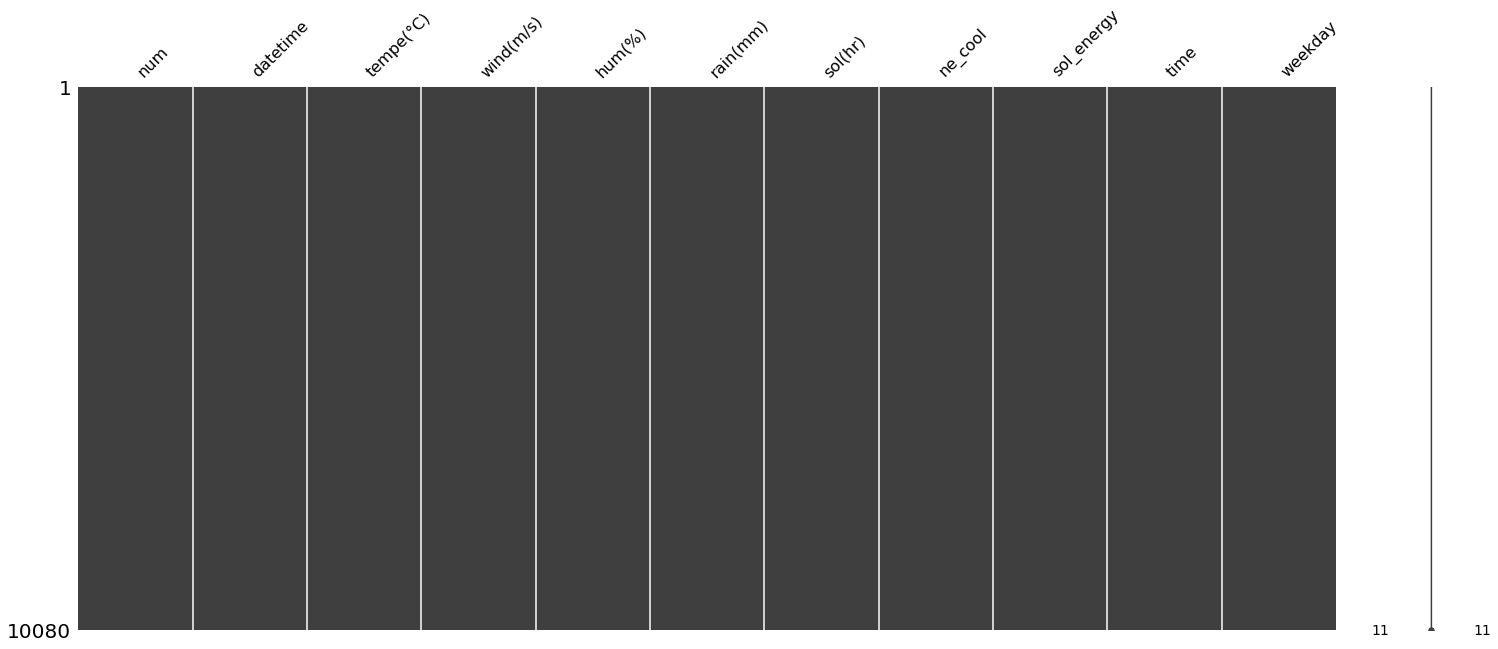

In [24]:
msno.matrix(test)